# Split-Apply-Combine Explained

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("../data/titanic_ver01.csv")

In [3]:
titanic_slice = titanic.iloc[:10, [3,4]]
# use the first 10 rows, and "sex, Age" columns

In [4]:
titanic_slice

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [5]:
list(titanic_slice.groupby(by = "Sex"))[0][1]
# 注意index依舊保持。

,Sex,Age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [6]:
list(titanic_slice.groupby(by = "Sex"))[1][1]
# 注意index依舊保持。

,Sex,Age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


接下來我們想計算，各組下的平均年齡。

In [7]:
titanic_slice.groupby(by = "Sex")

可以看到這是一個 DataFrameGroupBy object 

In [8]:
titanic_slice.groupby(by = "Sex").mean()

,Age
Sex,
female,28.00
male,28.25


- 注意到他的mean計算，分母是沒有加入NaN的。
- 也就是說Group是ignore NaN

![GroupBy_split_apply_combine](../pic/GroupBy_split_apply_combine.jpg )

In [9]:
titanic.groupby("Sex").sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


如果只對某些columns有興趣，就用之前交的方法選出cloumns。

In [10]:
titanic.groupby("Sex").Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

如果沒有特別指定要計算哪個欄位，就會把所有數值相關的欄位都計算出來。

In [11]:
titanic.groupby("Sex")[["Fare", "Age"]].max()

,Fare,Age
Sex,,
female,512.3292,63.0
male,512.3292,80.0


In [12]:
new_df = titanic.groupby("Sex").mean()
new_df = new_df.drop("PassengerId", axis = 1)

In [13]:
new_df

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


---
# 繪圖 Visualize

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

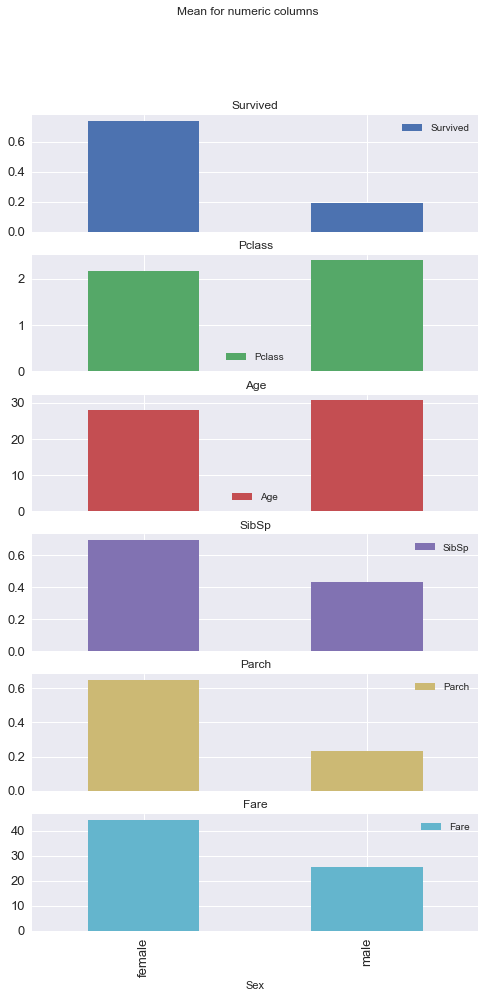

In [15]:
new_df.plot(kind = "bar", subplots=True, figsize=(8, 15), fontsize=13, title="Mean for numeric columns")
plt.show()

可以觀察一下，numeric的欄位，平均下來，有哪些欄位，男性會大於女性  
至於顯不顯著，要再進一步探討。

---
# 下一個Note將教學 Split-Apply-Combine Applied